# Demo of the workflow to find a template image in a large image
This is particulary useful for two things
1. Finding a template image in a large orthomosaic image.
2. Re-Identifying objects if they reappear in a different image

The workflow is as follows:
- create tiles of images
- find tiles in other images
- build a stack of tiles
- assess image quality in stack

In [1]:
import os

import pandas as pd
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from pathlib import Path

full_image = Path("./tests/data/DJI_0018.JPG")
output_path = Path("./output")
template_path = output_path / "crops"

if not os.path.exists(template_path):
    template_path.mkdir(parents=True, exist_ok=True)
    
image = Image.open(full_image)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

imr = np.array(image, dtype=np.uint8)
ax.imshow(imr)
ax.set_title("original image")

In [3]:
### Create Tiles

In [4]:
from image_template_search.image_rasterization import create_regular_raster_grid

crop_height = crop_width = 1024
grid, _ = create_regular_raster_grid(max_x=image.size[0], max_y=image.size[1],
                                                     slice_height=crop_height, slice_width=crop_width)

In [5]:
# crop the grid
from image_template_search.image_rasterization import crop_polygons

crops = crop_polygons(image, grid)


for i, crop in enumerate(crops):
    crop.save(template_path / f"crop_{Path(full_image).stem}_{i}.jpg")
    print(f"saved crop_{i}.jpg")

saved crop_0.jpg
saved crop_1.jpg
saved crop_2.jpg
saved crop_3.jpg
saved crop_4.jpg
saved crop_5.jpg
saved crop_6.jpg
saved crop_7.jpg


### Looking for the patches

In [ ]:
from image_template_search.image_patch_finder import ImagePatchFinderLG

## Find a crop within other images

template_name = "crop_DJI_0018_7.jpg"
template_path = template_path / template_name

large_image_path = Path(full_image)

ipf_t = ImagePatchFinderLG(template_path=template_path,
                           large_image_path=large_image_path)

found_match = ipf_t.find_patch(similarity_threshold=0.0005)
ipf_t.find_patch()
ipf_t.project_image()


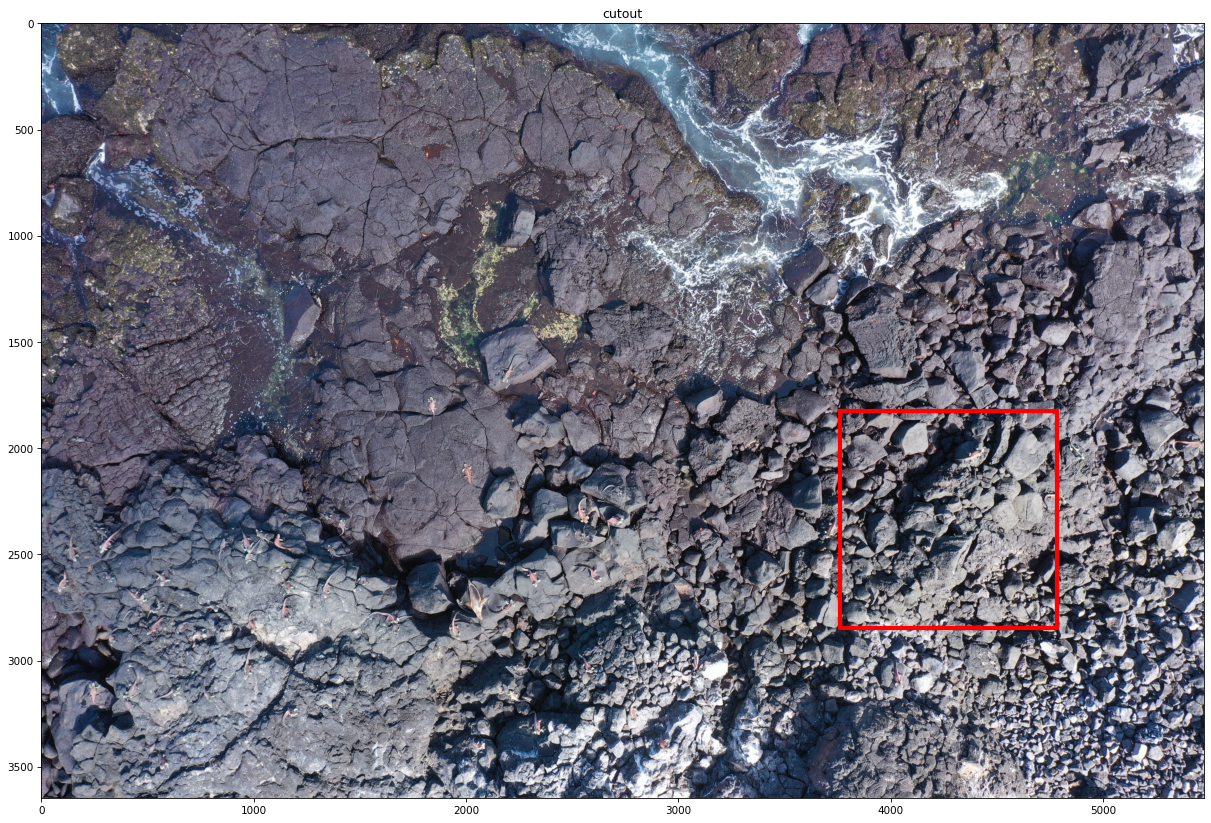

In [7]:
from image_template_search.util.util import visualise_image, visualise_polygons

ax = visualise_image(image_path=large_image_path, show=False, title="cutout", dpi=75)
ax_i = visualise_image(image_path=ipf_t.large_image_path, show=False, dpi=150)
visualise_polygons(polygons=[ipf_t.proj_template_polygon], ax=ax_i, show=True, color="red", linewidth=4)

#### For the same patch by tiling the large image
Can be useful for large images like orthomosaics

In [9]:
import tempfile
from image_template_search.image_patch_finder import find_patch_tiled, find_patch, find_patch_stacked

with tempfile.TemporaryDirectory() as cache_dir:
    print('created temporary directory', cache_dir)

    cache_dir = Path(cache_dir)

    crop = find_patch_tiled(template_path, large_image_path,
                            output_path=output_path,
                            tile_size_x=1200,
                            tile_size_y=1200,
                            cache_path=Path(cache_dir))



2024-11-29 09:29:41.288 | INFO     | image_template_search.opencv_findobject_homography:_cached_detect_and_compute:63 - Cache Path: /var/folders/2k/78nn7s4548986wsjh29rhj9w0000gn/T/tmpd_f31h2b
2024-11-29 09:29:41.484 | INFO     | image_template_search.image_patch_finder:_cached_tiled_keypoints_and_descriptors_extraction:49 - Loading large image from tests/data/DJI_0018.JPG


created temporary directory /var/folders/2k/78nn7s4548986wsjh29rhj9w0000gn/T/tmpd_f31h2b


2024-11-29 09:29:41.629 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0018_tile_0_0.jpg
2024-11-29 09:29:41.638 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0018_tile_1200_0.jpg
2024-11-29 09:29:41.648 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0018_tile_2400_0.jpg
2024-11-29 09:29:41.659 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0018_tile_3600_0.jpg
2024-11-29 09:29:41.664 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0018_tile_4800_0.jpg
2024-11-29 09:29:41.673 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0018_tile_0_1200.jpg
2024-11-29 09:29:41.688 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0018_tile_1200_1200.jpg
2024-11-29 09

The camera rotated: 0.0 degrees


In [17]:

# template_path = Path(f"./data/crop_0_1280.jpg")

with tempfile.TemporaryDirectory() as cache_dir:
    cache_dir = Path(cache_dir)

    crop = find_patch_tiled(template_path,
                            full_image,
                            tile_size_x=1500,
                            tile_size_y=1500,
                            output_path=output_path,
                            cache_path=cache_dir, MIN_MATCH_COUNT=170)

print(crop)

2024-11-29 09:42:00.368 | INFO     | image_template_search.opencv_findobject_homography:_cached_detect_and_compute:63 - Cache Path: /var/folders/2k/78nn7s4548986wsjh29rhj9w0000gn/T/tmp0ojkxlht
2024-11-29 09:42:00.713 | INFO     | image_template_search.image_patch_finder:_cached_tiled_keypoints_and_descriptors_extraction:49 - Loading large image from tests/data/DJI_0018.JPG
2024-11-29 09:42:00.855 | INFO     | image_template_search.opencv_findobject_homography:_cached_detect_and_compute:63 - Cache Path: /var/folders/2k/78nn7s4548986wsjh29rhj9w0000gn/T/tmp0ojkxlht
2024-11-29 09:42:01.175 | INFO     | image_template_search.image_patch_finder:_cached_tiled_keypoints_and_descriptors_extraction:82 - Found 24242 keypoints in tile x:0 y:0
2024-11-29 09:42:01.258 | INFO     | image_template_search.opencv_findobject_homography:_cached_detect_and_compute:63 - Cache Path: /var/folders/2k/78nn7s4548986wsjh29rhj9w0000gn/T/tmp0ojkxlht
2024-11-29 09:42:01.815 | INFO     | image_template_search.image_p

False


In [16]:
template_path = Path(f"./tests/data/crop_0_1280.jpg")
with tempfile.TemporaryDirectory() as cache_dir:
    # cache_dir = Path(cache_dir)
    cache_dir = Path("./cache") # temporary hack to speed up testing

    crop = find_patch_tiled(template_path,
                            full_image,
                            tile_size_x=1500,
                            tile_size_y=1500,
                            output_path=output_path,
                            cache_path=cache_dir,
                            MIN_MATCH_COUNT=100)


2024-11-29 09:41:37.649 | INFO     | image_template_search.opencv_findobject_homography:_cached_detect_and_compute:63 - Cache Path: cache
2024-11-29 09:41:38.016 | INFO     | image_template_search.image_patch_finder:_cached_tiled_keypoints_and_descriptors_extraction:49 - Loading large image from tests/data/DJI_0018.JPG
2024-11-29 09:41:38.160 | INFO     | image_template_search.opencv_findobject_homography:_cached_detect_and_compute:63 - Cache Path: cache
2024-11-29 09:41:38.464 | INFO     | image_template_search.image_patch_finder:_cached_tiled_keypoints_and_descriptors_extraction:82 - Found 24242 keypoints in tile x:0 y:0
2024-11-29 09:41:38.570 | INFO     | image_template_search.opencv_findobject_homography:_cached_detect_and_compute:63 - Cache Path: cache
2024-11-29 09:41:39.205 | INFO     | image_template_search.image_patch_finder:_cached_tiled_keypoints_and_descriptors_extraction:82 - Found 55548 keypoints in tile x:1500 y:0
2024-11-29 09:41:39.295 | INFO     | image_template_sear

## Caching speeds up the process
If you are working with a large image, it is useful to cache the generation of keypoints and descriptors

In [12]:


template_path

large_image_paths = [Path(f"./tests/data/DJI_0018.JPG"),
                     Path(f"./tests/data/DJI_0019.JPG"), 
                     Path(f"./tests/data/DJI_0227.JPG")]

output_path_stack = output_path / "stack"

with tempfile.TemporaryDirectory() as cache_dir:
    cache_dir = Path(cache_dir)
    cache_dir = Path("./cache_nb") # temporary hack to speed up testing


    crops = find_patch_stacked(template_path,
                               large_image_paths,
                               output_path=output_path_stack
                               )



2024-11-29 09:35:58.046 | INFO     | image_template_search.image_similarity:find_patch_stacked:602 - finding patch in tests/data/DJI_0018.JPG
2024-11-29 09:35:58.050 | INFO     | image_template_search.opencv_findobject_homography:_cached_detect_and_compute:63 - Cache Path: cache_nb
2024-11-29 09:35:58.277 | INFO     | image_template_search.image_patch_finder:_cached_tiled_keypoints_and_descriptors_extraction:49 - Loading large image from tests/data/DJI_0018.JPG
2024-11-29 09:35:58.412 | INFO     | image_template_search.opencv_findobject_homography:_cached_detect_and_compute:63 - Cache Path: cache_nb
2024-11-29 09:35:58.721 | INFO     | image_template_search.image_patch_finder:_cached_tiled_keypoints_and_descriptors_extraction:82 - Found 24242 keypoints in tile x:0 y:0
2024-11-29 09:35:58.803 | INFO     | image_template_search.opencv_findobject_homography:_cached_detect_and_compute:63 - Cache Path: cache_nb
2024-11-29 09:35:59.433 | INFO     | image_template_search.image_patch_finder:_c

The camera rotated: -0.04 degrees


2024-11-29 09:36:04.132 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0019_tile_4500_0.jpg
2024-11-29 09:36:04.147 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0019_tile_0_1500.jpg
2024-11-29 09:36:04.161 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0019_tile_1500_1500.jpg
2024-11-29 09:36:04.175 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0019_tile_3000_1500.jpg
2024-11-29 09:36:04.184 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0019_tile_4500_1500.jpg
2024-11-29 09:36:04.191 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0019_tile_0_3000.jpg
2024-11-29 09:36:04.198 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0019_tile_1500_3000.jpg
2

The camera rotated: 0.87 degrees


2024-11-29 09:36:10.109 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0227_tile_1500_1500.jpg
2024-11-29 09:36:10.122 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0227_tile_3000_1500.jpg
2024-11-29 09:36:10.130 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0227_tile_4500_1500.jpg
2024-11-29 09:36:10.135 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0227_tile_0_3000.jpg
2024-11-29 09:36:10.141 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0227_tile_1500_3000.jpg
2024-11-29 09:36:10.146 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0227_tile_3000_3000.jpg
2024-11-29 09:36:10.150 | INFO     | image_template_search.image_rasterization:tile_large_image:151 - Tile saved to DJI_0227_tile_4500_3000

In [15]:
output_path.resolve()
crops

[]

### Looking for a large image overlap with another large image. This time with a different source image

In [ ]:
template_image_path = Path("./tests/data/DJI_0019.JPG")
large_image_path = Path(full_image)

crop = find_patch(template_image_path, large_image_path, output_path=output_path)


# Annotation based workflow of the images

In [ ]:
from examples.playground.detection_deduplication import find_annotated_template_matches
import json
from image_template_search.util.HastyAnnotationV2 import hA_from_file

"""
take detections, look for those on other images
:return:
"""
hA = hA_from_file(
    file_path=Path("/Users/christian/data/2TB/ai-core/data/detection_deduplication/labels_2024_10_10.json"))
images_path = Path("/Users/christian/data/2TB/ai-core/data/detection_deduplication/images_2024_10_07/")
output_path = Path("/Users/christian/data/2TB/ai-core/data/detection_deduplication/cutouts/")

hA.images = sorted(hA.images, key=lambda obj: obj.image_name)
# hA.images = hA.images[0:5]  # take only the first 8 images

# TODO get only the nearest images to the template image

for i, ann_template_image in enumerate(hA.images):
    
    other_images = hA.images[i+1:5]
    
    covered_objects = find_annotated_template_matches(images_path, ann_template_image, other_images, output_path)
    
    with open(output_path / f"image_data_{ann_template_image.image_name}.json", 'w') as json_file:
        # Serialize the list of Pydantic objects to a list of dictionaries
        image_data_dict_list = [json.loads(image_data.json()) for image_data in covered_objects]

        # Save the list of dictionaries to a JSON file
        json.dump(image_data_dict_list, json_file, indent=4)


## Explore annotations
**TODO** work through the annotations and display them in fiftyOne and then in CVAT

In [ ]:
!export FIFTYONE_CVAT_USERNAME=<YOUR_USERNAME>
!export FIFTYONE_CVAT_PASSWORD=<YOUR_PASSWORD>

In [ ]:
# Example
import fiftyone as fo

dataset_dir = "/Users/christian/PycharmProjects/hnee/image_template_search/tests/data"
name = "my_dataset"

dataset = fo.Dataset.from_dir(
    dataset_dir=dataset_dir,
    dataset_type=fo.types.ImageDirectory,
    name=name,
)

In [ ]:
dataset.persistent = True

In [ ]:
session = fo.launch_app(dataset)